In [1]:
%matplotlib notebook

In [3]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [4]:
# csv
us_df = pd.read_csv('Resources/US_youtube_trending_data.csv')
ca_df = pd.read_csv('Resources/CA_youtube_trending_data.csv')

#joint
frames = [us_df, ca_df]
combined_dfs = pd.concat(frames)

In [5]:
# cleaning up date and time
for frame in frames:
    frame['publishedAt'] = pd.to_datetime(frame['publishedAt'])
    frame['month'] = frame['publishedAt'].dt.month_name()
    frame['weekday'] = frame['publishedAt'].dt.day_name()
    frame['year'] = frame['publishedAt'].dt.year

In [6]:
# jsons

with open('Resources/US_category_id.json') as us_file:
    us_data = json.load(us_file) 

#print(us_data)

categoryNum = []
for category in us_data['items']:
    categoryNum.append(category['id'])

categoryNames = []
for category in us_data['items']:
    categoryNames.append(category['snippet']['title'])
    
categoryDict = {categoryNum[i]: categoryNames[i] for i in range(len(categoryNum))}

In [7]:
us_df_narrow = us_df[['title', 'categoryId', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'month', 'weekday', 'year']]
ca_df_narrow = ca_df[['title', 'categoryId', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'month', 'weekday', 'year']]

In [8]:
#cleaned dfs

us_df_cleaned = us_df_narrow.loc[us_df_narrow['view_count'] > 0]
clean_us_df = us_df_cleaned.drop_duplicates().dropna(how='any')

ca_df_cleaned = ca_df_narrow.loc[ca_df_narrow['view_count'] > 0]
clean_ca_df = ca_df_cleaned.drop_duplicates().dropna(how='any')

In [9]:
clean_us_df['categoryName'] = [categoryDict[str(x)] for x in clean_us_df['categoryId']]
clean_ca_df['categoryName'] = [categoryDict[str(x)] for x in clean_ca_df['categoryId']]

catNames = clean_ca_df['categoryName'].unique()

clean_concat = [clean_us_df, clean_ca_df]
cleanTot = pd.concat(clean_concat)

In [15]:
# creating yearly dfs

years = [2020, 2021, 2022]

us_dfs_year = {}
ca_dfs_year = {}

for year in years:
    us_dfs_year[year] = clean_us_df.loc[clean_us_df['year'] == year]
    ca_dfs_year[year] = clean_ca_df.loc[clean_ca_df['year'] == year]

# Groupby Categories, average yearly views per
usCatViews = {}
caCatViews = {}

for year in years:
    usCatViews[year] = us_dfs_year[year].groupby(['categoryName'])['view_count'].mean()
    
    caCatViews[year] = ca_dfs_year[year].groupby(['categoryName'])['view_count'].mean()
    

<IPython.core.display.Javascript object>


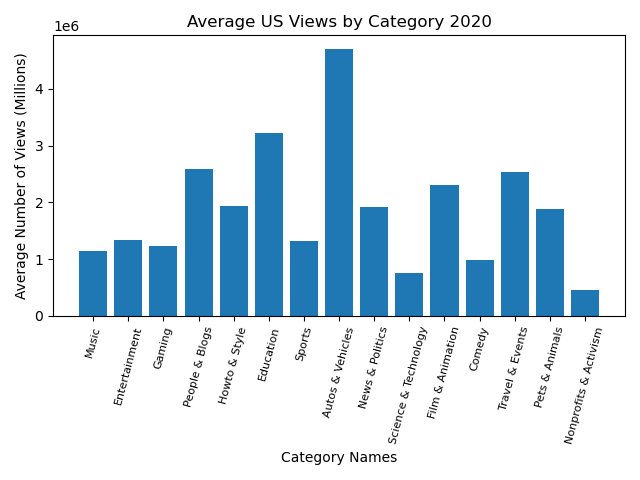

<IPython.core.display.Javascript object>


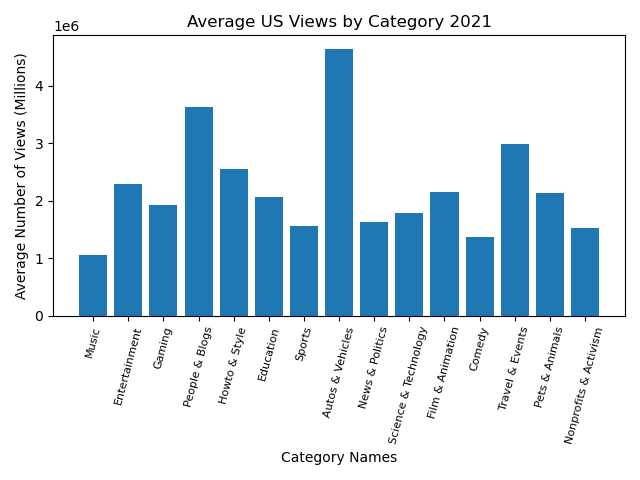

<IPython.core.display.Javascript object>


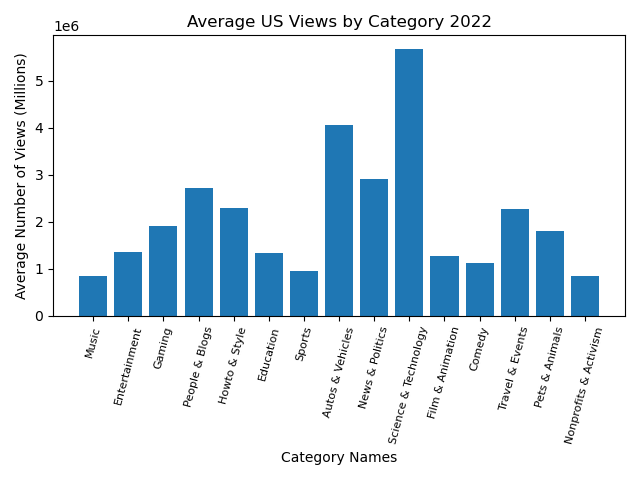

In [36]:
# Average Views in US by Category by Year

for year in years:
    plt.figure()
    plt.bar(catNames,usCatViews[year])
    plt.title(f"Average US Views by Category {year}")
    plt.xlabel("Category Names")
    plt.ylabel("Average Number of Views (Millions)")
    plt.xticks(fontsize=8,rotation = 75)
    plt.tight_layout()
    plt.savefig(f'Average US Views by {year}.png')

<IPython.core.display.Javascript object>


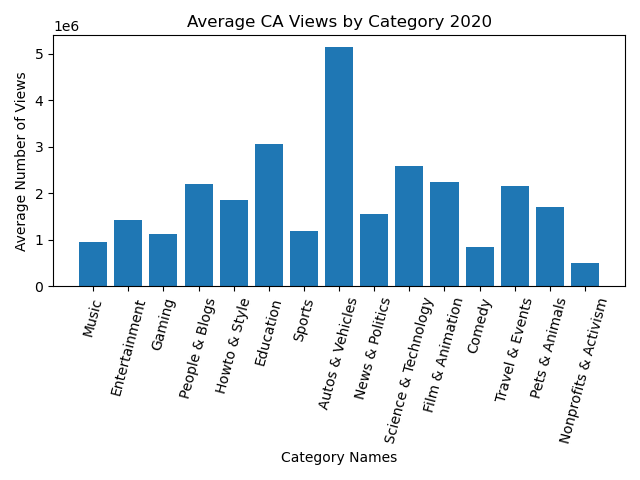

<IPython.core.display.Javascript object>


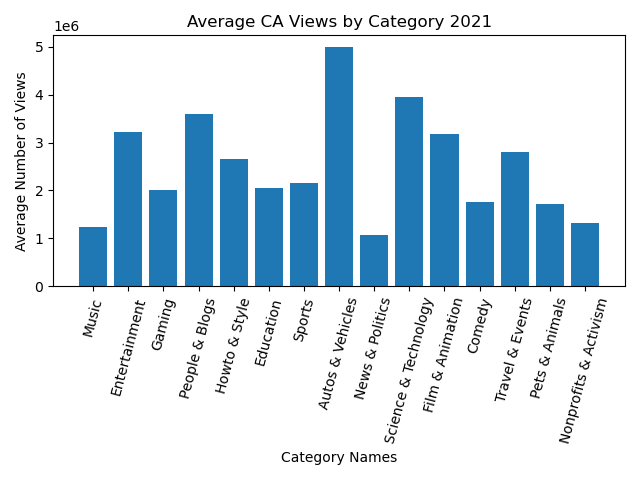

<IPython.core.display.Javascript object>


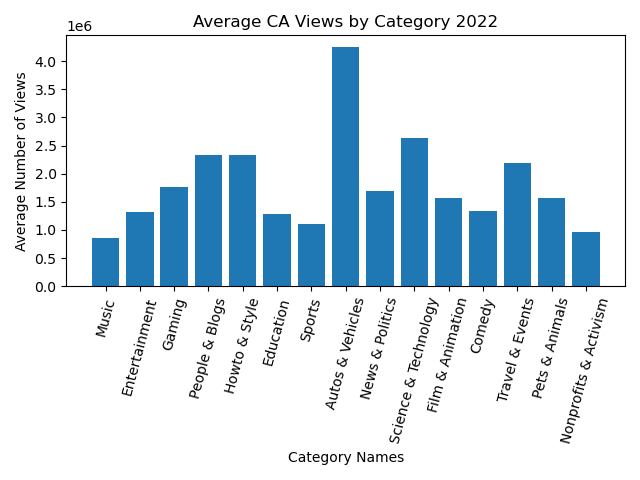

In [29]:
# Average Views in CA by Category by Year

for year in years:
    plt.figure()
    plt.bar(catNames,caCatViews[year])
    plt.title(f"Average CA Views by Category {year}")
    plt.xlabel("Category Names")
    plt.ylabel("Average Number of Views")
    plt.xticks(rotation = 75)
    plt.tight_layout()
    plt.savefig(f'Average US Views by {year}.png')

In [12]:
# calculate average engagement by category

viewsByCategory = clean_us_df.groupby(['categoryName'])['view_count'].mean()
likesByCategory = clean_us_df.groupby(['categoryName'])['likes'].mean()
commentsByCategory = clean_us_df.groupby(['categoryName'])['comment_count'].mean()


<IPython.core.display.Javascript object>


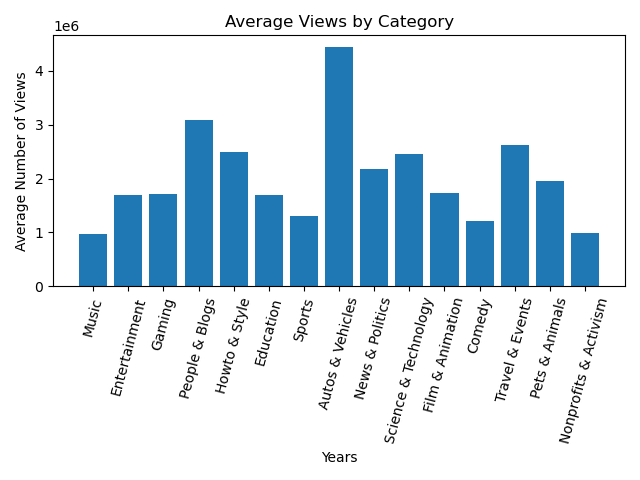

In [45]:
# views by cat

plt.figure()
plt.bar(catNames,viewsByCategory)
plt.title(f"Average Views by Category")
plt.xlabel("Years")
plt.ylabel("Average Number of Views")
plt.xticks(rotation = 75)
plt.tight_layout()
plt.savefig(f'Views by cat.png')

<IPython.core.display.Javascript object>


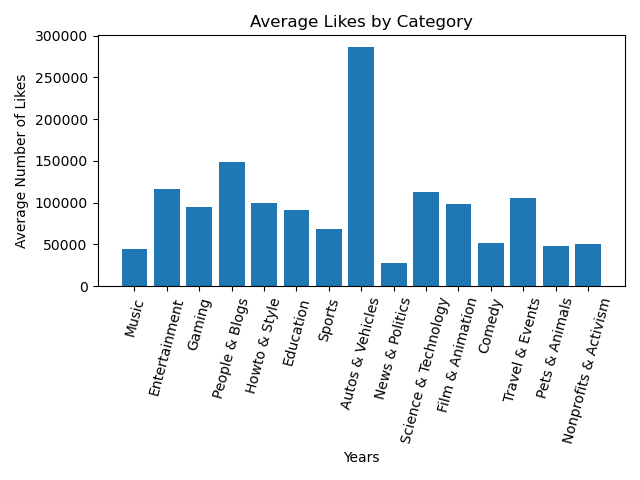

In [46]:
# likes by cat

plt.figure()
plt.bar(catNames,likesByCategory)
plt.title(f"Average Likes by Category")
plt.xlabel("Years")
plt.ylabel("Average Number of Likes")
plt.xticks(rotation = 75)
plt.tight_layout()
plt.savefig(f'Likes by cat.png')

<IPython.core.display.Javascript object>


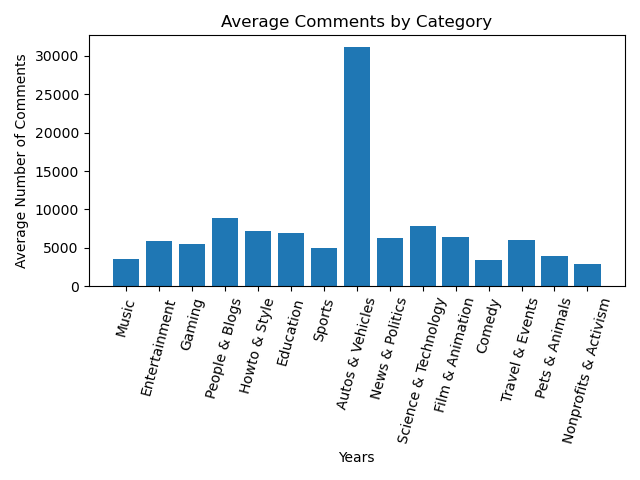

In [47]:
# comments by cat

plt.figure()
plt.bar(catNames,commentsByCategory)
plt.title(f"Average Comments by Category")
plt.xlabel("Years")
plt.ylabel("Average Number of Comments")
plt.xticks(rotation = 75)
plt.tight_layout()
plt.savefig(f'Comments by cat.png')

<IPython.core.display.Javascript object>


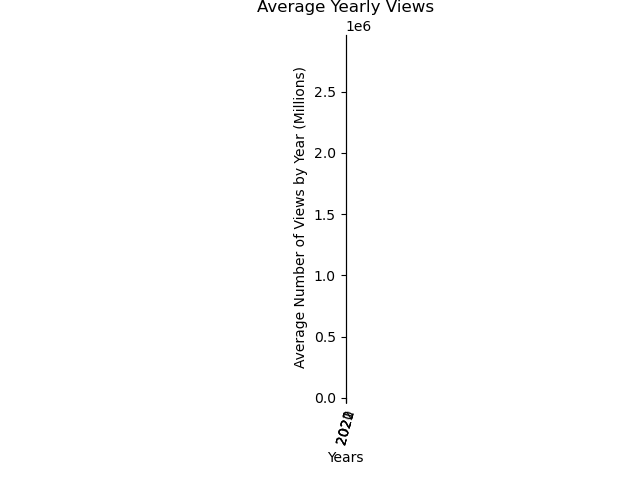

In [48]:
filtered_df = clean_us_df[clean_us_df['year'] != 2023]

viewsByYear = filtered_df.groupby(['year'])['view_count'].mean()
viewsByYear = viewsByYear.sort_values(ascending=False)

plt.figure()
plt.bar(years,viewsByYear)
plt.title(f"Average Yearly Views")
plt.xlabel("Years")
plt.xticks(years)
plt.ylabel("Average Number of Views by Year (Millions)")
plt.xticks(rotation = 75)
plt.tight_layout()
plt.savefig(f'Total Yearly Views.png')

<IPython.core.display.Javascript object>


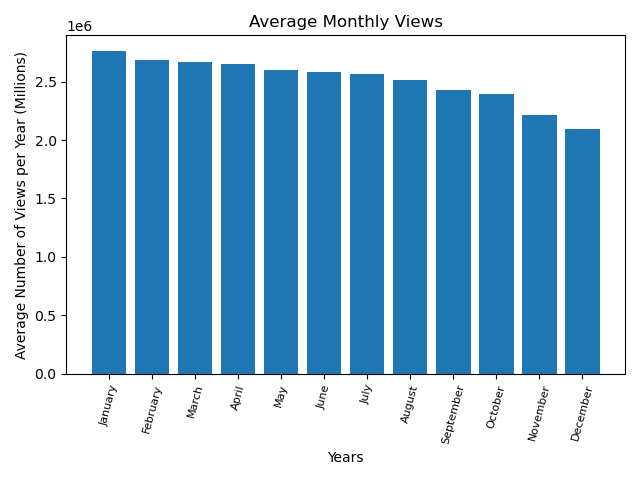

In [35]:
viewsByMonth = clean_us_df.groupby(['month'])['view_count'].mean()
viewsByMonth = viewsByMonth.sort_values(ascending=False)

import calendar
months=calendar.month_name[1:]

plt.figure()
plt.bar(months,viewsByMonth)
plt.title(f"Average Monthly Views")
plt.xlabel("Years")
plt.ylabel("Average Number of Views per Year (Millions)")
plt.xticks(fontsize=8, rotation = 75)
plt.tight_layout()
plt.savefig(f'Total Monthly Views.png')

<IPython.core.display.Javascript object>


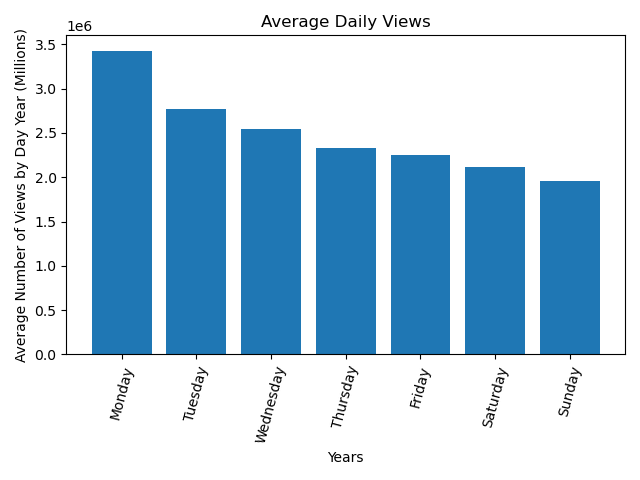

In [28]:
viewsByWeekday = clean_us_df.groupby(['weekday'])['view_count'].mean()
viewsByWeekday = viewsByWeekday.sort_values(ascending=False)

days = calendar.day_name

plt.figure()
plt.bar(days,viewsByWeekday)
plt.title(f"Average Daily Views")
plt.xlabel("Years")
plt.ylabel("Average Number of Views by Day Year (Millions)")
plt.xticks(rotation = 75)
plt.tight_layout()
plt.savefig(f'Total Daily Views.png')

In [52]:
clean_us_df['categoryName'].value_counts()

Entertainment            41206
Gaming                   40501
Music                    33954
Sports                   23238
People & Blogs           17792
Comedy                   10727
Film & Animation          8143
News & Politics           7572
Science & Technology      6173
Howto & Style             5532
Education                 5016
Autos & Vehicles          3976
Travel & Events           1153
Pets & Animals             932
Nonprofits & Activism      114
Name: categoryName, dtype: int64

ValueError: could not convert string to float: 'People & Blogs'